In [107]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)
(256, 256)


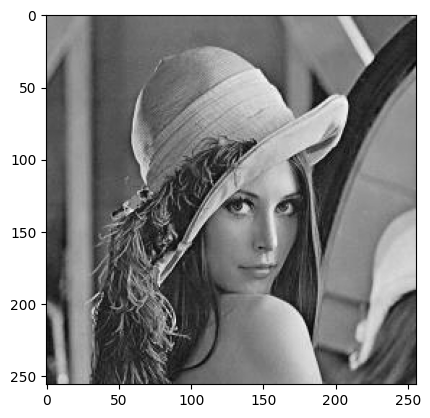

In [108]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/lena256.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [109]:
def saturation(value):
  if(value > 255):
    value = 255
  elif(value < 0):
    value = 0
  return value

In [110]:
kernel3 = np.ones((3,3), np.float32)/9
kernel5 = np.ones((5,5), np.float32)/25
kernel7 = np.ones((7,7), np.float32)/49

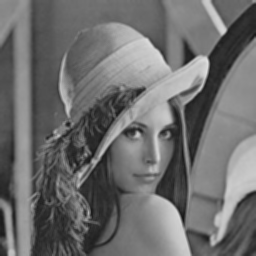

In [111]:
output = cv2.filter2D(gImg, -1, kernel3)
cv2_imshow(output)

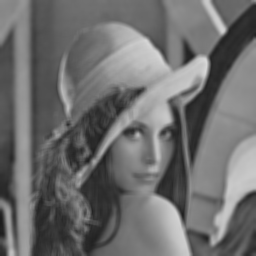

In [112]:
output = cv2.filter2D(gImg, -1, kernel5)
cv2_imshow(output)

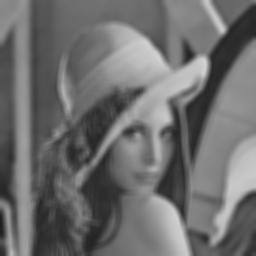

In [113]:
output = cv2.filter2D(gImg, -1, kernel7)
cv2_imshow(output)

In [114]:
gOut = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

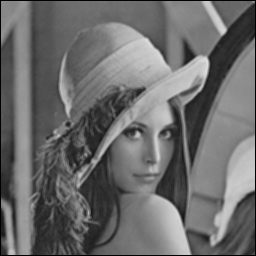

In [115]:
gOut = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

for h in range(1, gImg.shape[0]-1):
  for w in range(1, gImg.shape[1]-1):
    sum_val = 0 # Renamed sum to avoid conflict with built-in sum
    for i in range(-1, 2):
      for j in range(-1, 2):
        sum_val += gImg[h+i, w+j] * kernel3[i+1, j+1]
    # Apply saturation after the sum
    gOut[h,w] = saturation(sum_val)

cv2_imshow(gOut)

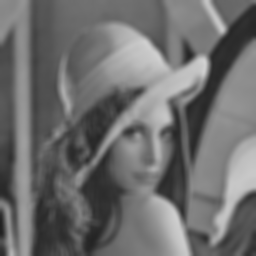

In [116]:
output = cv2.filter2D(output, -1, kernel3)
cv2_imshow(output)

In [117]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 8/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9

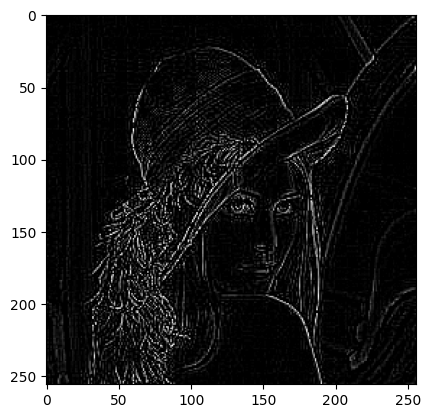

In [118]:
output = cv2.filter2D(gImg, -1, kernel3)
#cv2_imshow(output)
output = output * 5
plt.imshow(output, cmap='gray')

(256, 256)


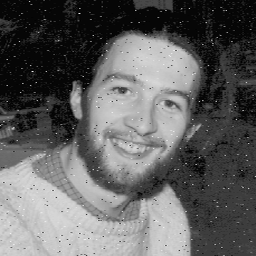

In [119]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/facenoise.bmp')
#img = cv2.imread('//content/gdrive/My Drive/IP/Images/Images/LenaG2.jpg')
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

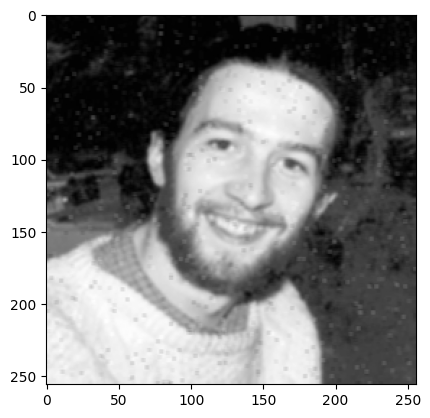

In [120]:
outImg = cv2.blur(gImg, (3,3))
#cv2_imshow(outImg)
plt.imshow(outImg, cmap='gray')

(256, 256)


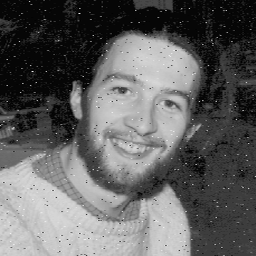

In [121]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/facenoise.bmp')
#img = cv2.imread('//content/gdrive/My Drive/IP/Images/Images/LenaG2.jpg')
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

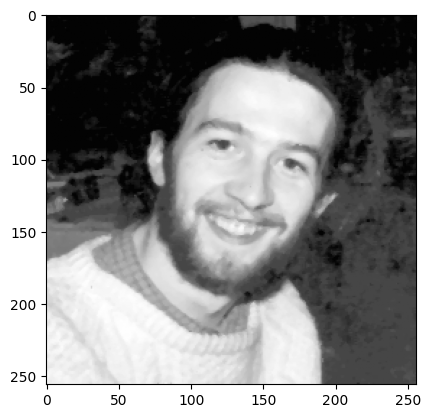

In [122]:
outImg = cv2.medianBlur(gImg, 3)
#cv2_imshow(outImg)
plt.imshow(outImg, cmap='gray')